In [132]:
#importing necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output

from sklearn.cluster import KMeans

In [133]:
#loading the dataset
players = pd.read_csv('players_22.csv')
players

C:\Users\HP-FOLIO\AppData\Local\Temp\ipykernel_13316\3181488082.py:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [134]:
#Selecting the features we will use for clustering
features = ['overall', 'potential', 'wage_eur', 'value_eur', 'age']

#Dropping rows where there exists any missing values in the columns of the features we use for clustering
players = players.dropna(subset=features)

In [135]:
#copying our data into a new dataframe 'data' which we will use for manipulation and clustering
data = players[features].copy()
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


Steps to carrying out the K-means clustering algorithm
1-Scale the data
2-Initialize the random centroids
3-Label each and every data point based on how far that data point is from each centroid
4-Update the centroids
5-Repeat steps 3 and 4 until centroids stop changing

In [136]:
#Step one - Scaling the data
#A min/max scaling will be implemented, this wil enables us to scale our data from a 1 to 10 scale

data = ((data - data.min())/(data.max()-data.min())) * 9 + 1
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [137]:
#Step two - Initializing random centroids for the total number of centroids k = 5

def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [138]:
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
overall,5.108696,5.304348,5.304348,1.391304,4.521739
potential,6.086957,4.913043,3.739130,5.695652,4.913043
wage_eur,3.124464,1.038627,1.000000,1.296137,1.811159
value_eur,1.021620,1.045976,1.022779,1.022779,1.021620
age,5.000000,4.000000,2.000000,4.666667,3.333333


In [139]:
#Step 3 - Labeleach data point based on how far they are from the centroid or their cluster center that is closest to each datapoint
# Calculating the eucladian distance from each centroid to data point
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))

    #finding out which clusters assigned to each individual player 
    return distances.idxmin(axis=1)

In [140]:
labels = get_labels(data,centroids)
labels

0        0
1        0
2        0
3        0
4        0
        ..
19234    3
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [141]:
#getting to know how many datapoints are assigned to each cluster
labels.value_counts()

1    8685
4    7393
0    2366
3     671
2      50
dtype: int64

In [142]:
#Step 4 - update the centroids based on which individual player is in a cluster
#we are going to find all the players in a cluster and take the geometric mean of each feature
#the geometric mean is the mean of center of points in a eucledian distance
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [143]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

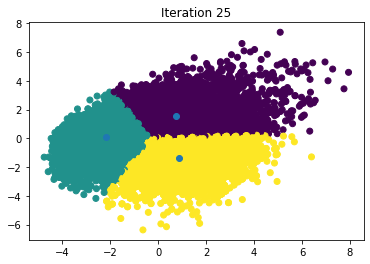

In [144]:
#declaring the maximun number of iterations for the cluster
max_iterations = 100
k = 3

#randomly initializing the centriods
centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

#making sure the iteration count is less than the maximum number of iterations and the total number of current centroids is not equal to old centroids 
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [145]:
centroids

,0,1,2
overall,5.807503,3.205672,4.781960
potential,6.497870,4.930905,4.506813
wage_eur,1.420500,1.028564,1.118498
value_eur,1.285685,1.026655,1.044909
age,3.598215,2.514741,5.467648


In [146]:
#comparing the features of every different football players in each cluster using the labels
players[labels==3][['short_name'] + features]

,short_name,overall,potential,wage_eur,value_eur,age


In [147]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [148]:
centroids = kmeans.cluster_centers_

In [149]:
pd.DataFrame(centroids,columns=features).T

,0,1,2
overall,3.582324,6.207795,4.801000
potential,5.197541,6.608096,4.504350
wage_eur,1.039206,1.646142,1.112941
value_eur,1.035194,1.407245,1.039989
age,2.705103,4.122692,5.610967
